In [1]:
# NEURAL NETWORK REGRESSION ALGORITHM THAT ATTEMPTS TO PREDICT THE PRICE OF HOUSING IN SEATTLE BASED ON CERTAIN FEATURES
# NN uses a 'relu' activation with an 'adam' optimizer and a 'mse' loss 
#
#

In [2]:
# IMPORT LIBRAIRIES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('../DATA/kc_house_data.csv')

In [6]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [7]:
#check to see if there is missing data.  In this case there is no missing data
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


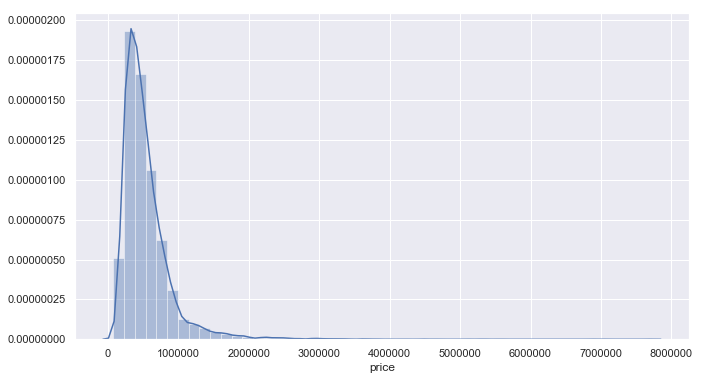

In [9]:
sns.set()
plt.figure(figsize=(11,6))
sns.distplot(df['price'],bins=50)

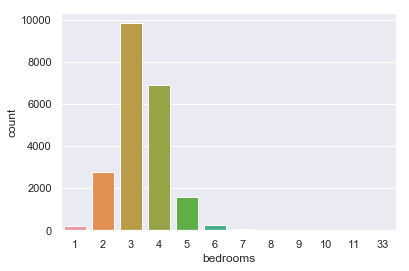

In [10]:
sns.countplot(df['bedrooms'])

In [11]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.002727,0.011536,-0.023803,0.008188,-0.010799,-0.005193,0.021617,-0.016925,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.266398,0.397370,0.036056,0.667951,0.605368,0.323799,0.053953,0.126424,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.006834,0.080008,0.026496,0.356563,0.479386,0.302808,0.155670,0.018389,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.063744,0.188386,-0.126479,0.665838,0.686668,0.283440,0.507173,0.050544,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.103854,0.284709,-0.059445,0.762779,0.876448,0.435130,0.318152,0.055308,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021632,0.074900,-0.008830,0.114731,0.184139,0.015418,0.052946,0.007686,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.023755,0.028814,-0.264075,0.458794,0.523989,-0.245715,0.489193,0.006427,-0.059541,0.049239,0.125943,0.280102,-0.010722
waterfront,-0.002727,0.266398,-0.006834,0.063744,0.103854,0.021632,0.023755,1.000000,0.401971,0.016611,0.082888,0.072109,0.080559,-0.026153,0.092873,0.030272,-0.014306,-0.041904,0.086507,0.030781
view,0.011536,0.397370,0.080008,0.188386,0.284709,0.074900,0.028814,0.401971,1.000000,0.045999,0.251728,0.167609,0.277078,-0.053636,0.103951,0.084622,0.005871,-0.078107,0.280681,0.072904
condition,-0.023803,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.016611,0.045999,1.000000,-0.146896,-0.158904,0.173849,-0.361592,-0.060788,0.002888,-0.015102,-0.105877,-0.093072,-0.003126


In [12]:
df.corr()['price'].sort_values()

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

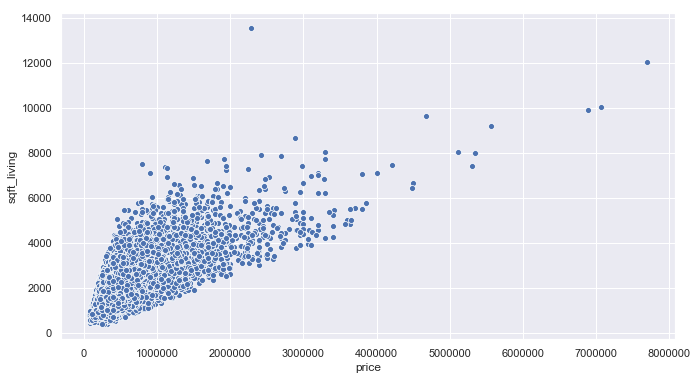

In [13]:
plt.figure(figsize=(11,6))
sns.scatterplot(x='price',y='sqft_living',data=df)

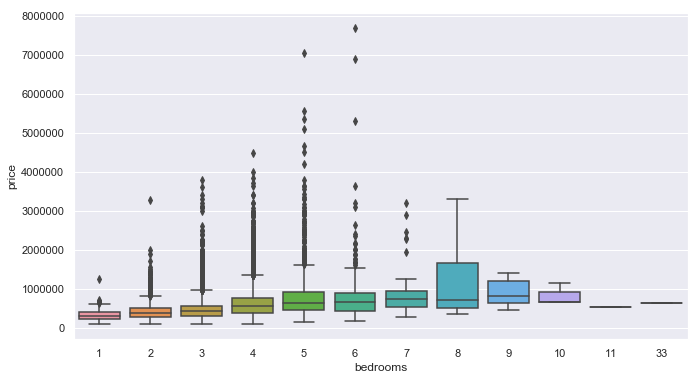

In [14]:
plt.figure(figsize=(11,6))
sns.boxplot(x='bedrooms',y='price',data=df)

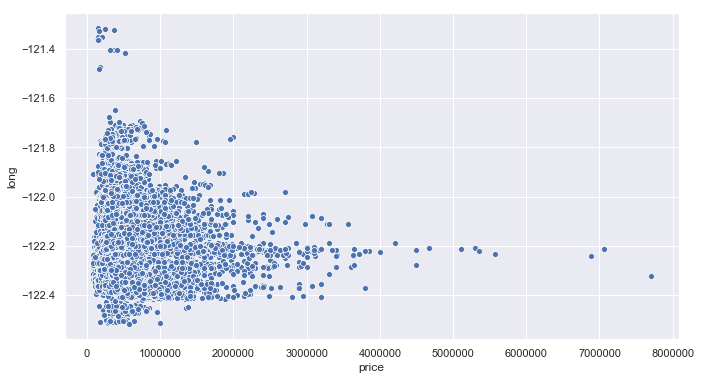

In [15]:
plt.figure(figsize=(11,6))
sns.scatterplot(x='price',y='long',data=df)

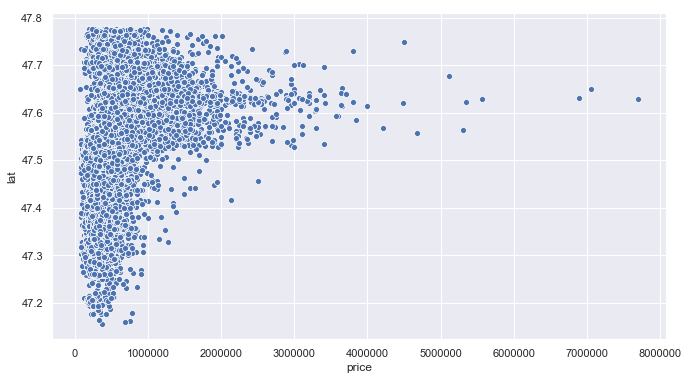

In [16]:
plt.figure(figsize=(11,6))
sns.scatterplot(x='price',y='lat',data=df)

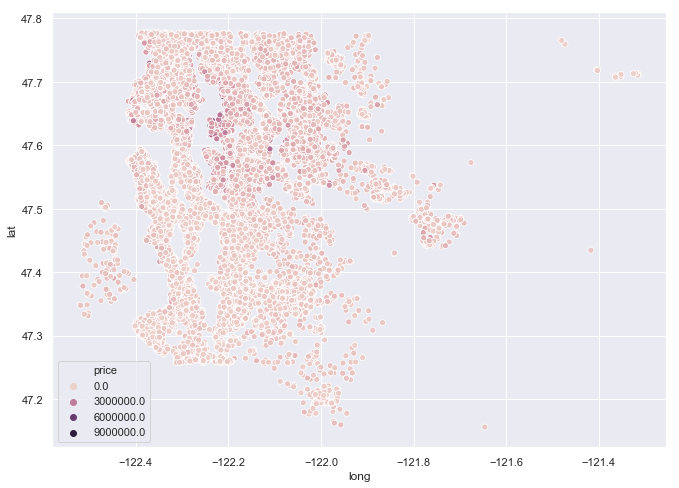

In [17]:
#At a certain combination of lat and long there seems to be an expensive area. 

plt.figure(figsize=(11,8))
sns.scatterplot(x='long',y='lat',data=df, hue = 'price')

In [28]:
# some of the outliers dont allow the hue to be big. try to clean this up. 
df.sort_values('price',ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [29]:
#cut off the top 1% of values
#there is 21597 houses in dataset 
len(df)

21597

In [30]:
#chop off the top 1% of houses
len(df)*0.01

215.97

In [31]:
#create new dataset with 99 percent of the values, gets rid of outlier expensive houses
non_top_1_perc = df.sort_values('price',ascending=False).iloc[216:]

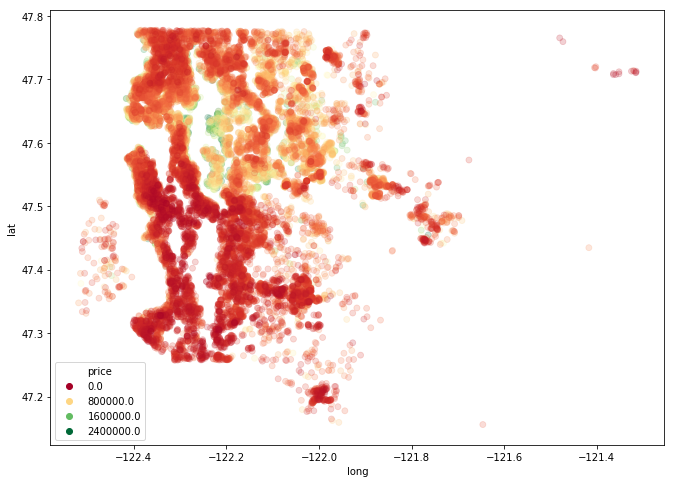

In [41]:
#redo map 
#At a certain combination of lat and long there seems to be an expensive area. 
plt.figure(figsize=(11,8))
sns.scatterplot(x='long',y='lat',data=non_top_1_perc, 
                edgecolor=None,
                alpha = 0.2,
                palette='RdYlGn',
                hue = 'price')

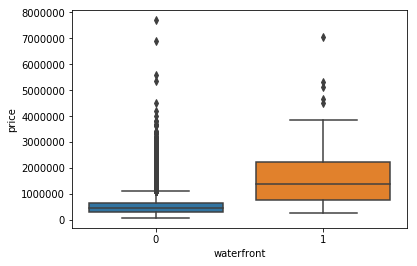

In [42]:
# see how waterfront affects prices, clear indicator on price
sns.boxplot(x='waterfront',y='price',data=df)

In [43]:
#drop features in the dataframe that we don't need
#drop house ID first
df = df.drop('id',axis=1)

In [44]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [45]:
# Now convert date to a datetime object
df['date'] = pd.to_datetime(df['date'])

In [46]:
# now we can call the month, year, etc easily 
df['year'] = df['date'].apply(lambda date: date.year)

In [47]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015


In [48]:
df['month'] = df['date'].apply(lambda date: date.month)

In [49]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


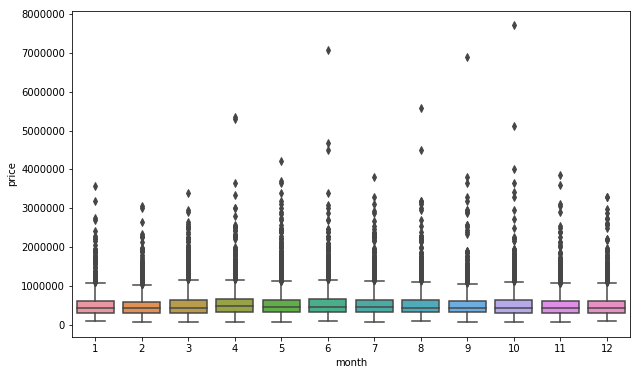

In [51]:
# see if there is any variation based on month
plt.figure(figsize=(10,6))
sns.boxplot(x='month',y='price',data=df)

In [52]:
df.groupby('month').mean()['price']

month
1     525963.251534
2     508520.051323
3     544057.683200
4     562215.615074
5     550849.746893
6     557534.318182
7     544892.161013
8     536655.212481
9     529723.517787
10    539439.447228
11    522359.903478
12    524799.902041
Name: price, dtype: float64

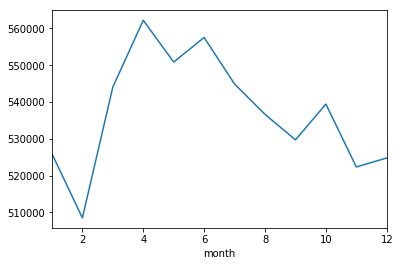

In [53]:
# graph shows not a huge range, but a little bit 
df.groupby('month').mean()['price'].plot()

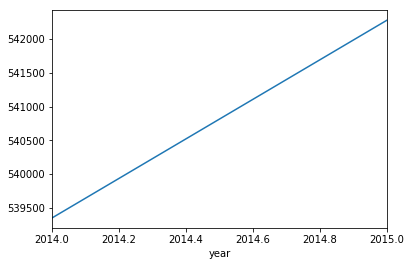

In [54]:
# now check to see year, year is as expected based on seattle growth and inflation

df.groupby('year').mean()['price'].plot()

In [56]:
# drop the date column now that we have month and year

df = df.drop('date',axis=1)

In [57]:
# check out remaining features. ZIPCODE poses a problem

df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


In [58]:
# Explore zipcode further
df['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
98042    547
98034    545
98118    507
98023    499
98006    498
98133    493
98059    468
98058    455
98155    446
98074    441
98033    432
98027    412
98125    409
98056    406
98053    403
98001    361
98075    359
98126    354
98092    351
98144    343
98106    335
98116    330
98029    321
98199    317
98004    317
        ... 
98112    269
98168    269
98055    268
98107    266
98136    263
98178    262
98030    256
98177    255
98166    254
98022    233
98105    229
98045    220
98002    199
98077    198
98011    195
98019    190
98108    186
98119    184
98005    168
98007    141
98188    136
98032    125
98014    124
98070    117
98109    109
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [59]:
# get rid of zipcodes.  More research into the zipcodes of seattle could help with this feature 
df = df.drop('zipcode',axis=1)

In [60]:
# Now look at yr_renovated.  Zero values mean that the house wasn't renovated
df['yr_renovated'].value_counts()

0       20683
2014       91
2013       37
2003       36
2000       35
2007       35
2005       35
2004       26
1990       25
2006       24
2009       22
1989       22
2002       22
1991       20
2001       19
1998       19
1994       19
1993       19
1987       18
1983       18
1984       18
2010       18
2008       18
1986       17
1985       17
1999       17
1992       17
2015       16
1995       16
1996       15
        ...  
1975        6
1978        6
1981        5
1964        5
1965        5
1958        5
1973        5
1969        4
1972        4
1960        4
1963        4
1956        3
1945        3
1974        3
1953        3
1955        3
1976        3
1957        3
1962        2
1950        2
1967        2
1946        2
1971        2
1940        2
1954        1
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

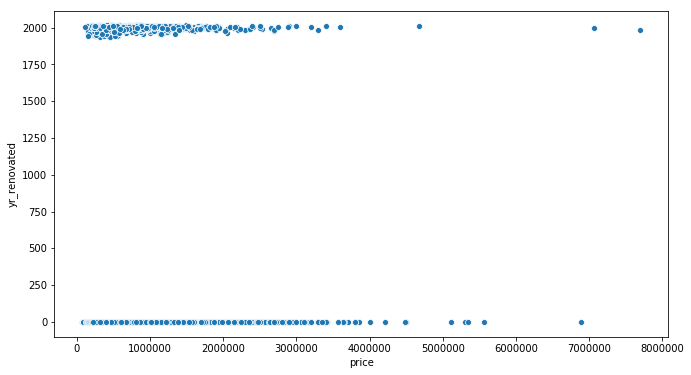

In [61]:
# turn all the years to categorize as renovated or not renovated
# the more recent the renovation then better value
plt.figure(figsize=(11,6))
sns.scatterplot(x='price',y='yr_renovated',data=df)

In [63]:
# look at sqr feet basement.  Similar story to renovated. 
# Have to make sure if we keep continuous. In this case higher values will go with higher prices. so keep them
df['sqft_basement'].value_counts()

0       13110
600       221
700       218
500       214
800       206
400       184
1000      149
900       144
300       142
200       108
530       107
480       106
750       105
450       103
720       102
620        91
580        85
840        85
420        81
860        80
1100       80
670        79
780        77
380        76
850        76
550        76
650        76
680        75
240        74
360        73
        ...  
1525        1
2580        1
2500        1
2180        1
1990        1
1284        1
516         1
276         1
20          1
915         1
2850        1
1798        1
2310        1
266         1
2120        1
1913        1
1481        1
3480        1
3000        1
2600        1
2360        1
1960        1
295         1
1880        1
1816        1
792         1
2590        1
935         1
2390        1
248         1
Name: sqft_basement, Length: 306, dtype: int64

In [68]:
# drop_no_basement = 
df.sort_values('sqft_basement').iloc[13110:]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
20597,220000.0,2,2.50,1000,1092,2.0,0,0,3,7,990,10,2004,0,47.5419,-122.271,1330,1466,2014,12
20596,163800.0,2,2.50,1000,1092,2.0,0,0,3,7,990,10,2004,0,47.5419,-122.271,1330,1466,2014,8
21418,485000.0,2,2.50,1430,923,3.0,0,0,3,8,1410,20,2008,0,47.6683,-122.355,1620,1505,2014,6
20054,524000.0,3,2.25,1370,1007,3.0,0,0,3,8,1330,40,2009,0,47.6682,-122.361,1570,1635,2015,1
20779,450000.0,2,1.50,960,1000,2.0,0,0,3,8,920,40,2008,0,47.6489,-122.335,1200,1297,2015,2
14201,350000.0,3,2.25,1410,1340,2.0,0,0,3,8,1370,40,1967,0,47.6108,-122.113,1730,2748,2015,4
11413,277700.0,2,1.50,1240,1055,2.0,0,0,3,8,1200,40,1967,0,47.6104,-122.112,1410,1340,2014,11
19123,276000.0,2,1.00,870,2676,1.0,0,0,3,7,820,50,2004,0,47.5702,-122.287,1500,1719,2014,10
4458,369000.0,3,2.50,1320,1683,2.0,0,0,3,8,1270,50,2004,0,47.5357,-122.365,1320,2206,2014,7
984,535000.0,3,2.50,1360,1016,3.0,0,0,3,7,1310,50,2003,0,47.6774,-122.324,1365,1156,2014,5


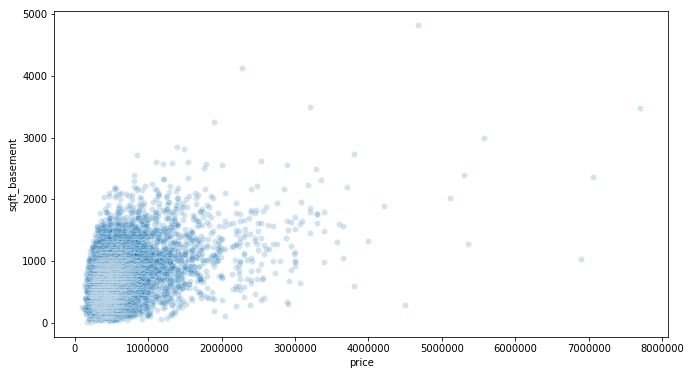

In [71]:
plt.figure(figsize=(11,6))
sns.scatterplot(x='price',y='sqft_basement',data=df.sort_values('sqft_basement').iloc[13110:],alpha=0.2)

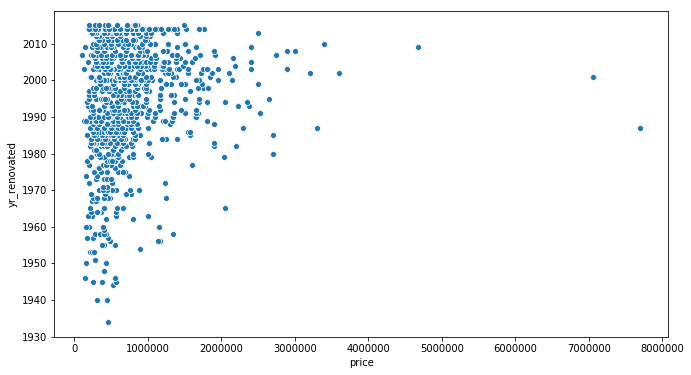

In [75]:
# The newer the renovation, typically means higher price
plt.figure(figsize=(11,6))
sns.scatterplot(x='price',y='yr_renovated',data=df.sort_values('yr_renovated').iloc[20683:])

In [77]:
# SET UP THE MACHINE LEARNING ALGORITHM WITH TRAIN, TEST, SPLIT

X = df.drop('price',axis=1).values # the .values changes the array to Numpy from a Pandas datframe
y = df['price'].values

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [80]:
# PERFORM SCALING ON DATA.  FIT ONLY TO TRAIN DATA 

from sklearn.preprocessing import MinMaxScaler

In [81]:
# USE MinMaxScaler

scaler = MinMaxScaler()

In [82]:
X_train = scaler.fit_transform(X_train)

In [83]:
# don't fit to test set because we dont want to make assumptions with test data.  Known as Data Leakage
X_test = scaler.transform(X_test)

In [86]:
# Import NN Libraries

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [87]:
# Set up your NN based on the number of features in the DataSet.  Neurons or units based on number of features
X_train.shape

(15117, 19)

In [88]:
# 19 features so have 19 neurons in a layer.  Explore how many layers we need later
model = Sequential()

#build model
model.add(Dense(19,activation = 'relu'))
model.add(Dense(19,activation = 'relu'))
model.add(Dense(19,activation = 'relu'))
model.add(Dense(19,activation = 'relu'))

model.add(Dense(1))

#compile model and choose an optimizer and a loss.  
#Since this is regression with a varying price outcome, choose mean-squared-error
model.compile(optimizer = 'adam', loss = 'mse')

In [89]:
#fit the model.  Add in validation data. Quickly check the test data after each Epoch.
#Explore if we are overfitting the data.
#because this is a big dataset, input batch_size (usually in powers of two). Smaller the batch size longer training will take
#but less likelyhood of overfitting data
model.fit(x=X_train, y=y_train, validation_data=(X_test,y_test),batch_size=128,epochs=400)

Train on 15117 samples, validate on 6480 samples
Epoch 1/400
15117/15117 [==============================] - 1s 90us/sample - loss: 430231222932.7194 - val_loss: 418845923333.0568
Epoch 2/400
15117/15117 [==============================] - 0s 27us/sample - loss: 427919569049.0886 - val_loss: 410769693809.7778
Epoch 3/400
15117/15117 [==============================] - 0s 27us/sample - loss: 396781847622.6510 - val_loss: 341949137179.1802
Epoch 4/400
15117/15117 [==============================] - 0s 27us/sample - loss: 268728873589.4243 - val_loss: 167331087468.7210
Epoch 5/400
15117/15117 [==============================] - 0s 25us/sample - loss: 122563560550.0816 - val_loss: 96343474115.3185
Epoch 6/400
15117/15117 [==============================] - 0s 27us/sample - loss: 98323130929.8215 - val_loss: 94103895659.4568
Epoch 7/400
15117/15117 [==============================] - 0s 27us/sample - loss: 96298041138.8884 - val_loss: 92300824232.1383
Epoch 8/400
15117/15117 [=====================

Epoch 64/400
15117/15117 [==============================] - 0s 25us/sample - loss: 37056319875.1922 - val_loss: 35787558391.1506
Epoch 65/400
15117/15117 [==============================] - 0s 24us/sample - loss: 36846280115.7605 - val_loss: 35715693145.7580
Epoch 66/400
15117/15117 [==============================] - 0s 24us/sample - loss: 36742309770.5418 - val_loss: 35378308867.1605
Epoch 67/400
15117/15117 [==============================] - 0s 25us/sample - loss: 36463654984.1413 - val_loss: 35207148394.8247
Epoch 68/400
15117/15117 [==============================] - 1s 39us/sample - loss: 36305131307.1662 - val_loss: 35003226627.7926
Epoch 69/400
15117/15117 [==============================] - 1s 34us/sample - loss: 36106337768.9690 - val_loss: 34859012424.6914
Epoch 70/400
15117/15117 [==============================] - 0s 27us/sample - loss: 35981541230.4981 - val_loss: 34690586032.3556
Epoch 71/400
15117/15117 [==============================] - 0s 29us/sample - loss: 35860525499.27

15117/15117 [==============================] - 0s 27us/sample - loss: 31278513166.6992 - val_loss: 29478231563.3778
Epoch 191/400
15117/15117 [==============================] - 0s 25us/sample - loss: 31232147706.6317 - val_loss: 29476997529.6000
Epoch 192/400
15117/15117 [==============================] - 0s 24us/sample - loss: 31308545200.1873 - val_loss: 29416621083.8124
Epoch 193/400
15117/15117 [==============================] - 0s 24us/sample - loss: 31285895404.0003 - val_loss: 29412923043.0815
Epoch 194/400
15117/15117 [==============================] - 0s 24us/sample - loss: 31256160416.6753 - val_loss: 29392264083.2790
Epoch 195/400
15117/15117 [==============================] - 0s 24us/sample - loss: 31225460794.3227 - val_loss: 29376633979.8914
Epoch 196/400
15117/15117 [==============================] - 0s 23us/sample - loss: 31178367393.9454 - val_loss: 29364828417.8963
Epoch 197/400
15117/15117 [==============================] - 0s 23us/sample - loss: 31197704362.1586 - v

15117/15117 [==============================] - 0s 20us/sample - loss: 29993984644.8687 - val_loss: 27778475177.4025
Epoch 317/400
15117/15117 [==============================] - 0s 19us/sample - loss: 30003211759.3025 - val_loss: 27818834400.3951
Epoch 318/400
15117/15117 [==============================] - 0s 24us/sample - loss: 29999235296.7557 - val_loss: 27772466163.3580
Epoch 319/400
15117/15117 [==============================] - 0s 20us/sample - loss: 29988314459.4298 - val_loss: 28065164118.5975
Epoch 320/400
15117/15117 [==============================] - 0s 19us/sample - loss: 29982509521.2267 - val_loss: 27766040085.4914
Epoch 321/400
15117/15117 [==============================] - 0s 18us/sample - loss: 29962051990.4298 - val_loss: 27778714348.4049
Epoch 322/400
15117/15117 [==============================] - 0s 20us/sample - loss: 29968158823.7751 - val_loss: 27737288501.7284
Epoch 323/400
15117/15117 [==============================] - 0s 20us/sample - loss: 29933963455.0220 - v

In [90]:
# Explore what model history looks like now. Exported as a dictrionary
model.history.history

{'loss': [430231222932.7195,
  427919569049.08856,
  396781847622.65106,
  268728873589.42435,
  122563560550.08163,
  98323130929.82152,
  96298041138.8884,
  94358917352.20692,
  92376881939.11914,
  90348806048.89542,
  88258868024.91711,
  86070807219.87907,
  83775082468.36278,
  81389896104.44824,
  78936532274.10942,
  76331015180.26064,
  73621601711.69624,
  70870804008.81233,
  68026062343.07865,
  65208685346.83443,
  62474720258.099884,
  59876966244.20189,
  57688018972.72104,
  55838535694.08957,
  54218430178.008865,
  52872899915.98544,
  51730624416.624466,
  50746545299.90659,
  49915847844.807304,
  49130660750.131905,
  48397763663.592514,
  47764608717.822845,
  47170318121.13409,
  46617338433.67229,
  46131091813.116356,
  45627514371.55626,
  45199671378.47139,
  44760038477.15393,
  44344596393.02401,
  44023693126.3293,
  43666345446.83522,
  43304018897.73473,
  42922551912.28313,
  42586785547.735664,
  42209171160.796455,
  41865147427.15618,
  41521633454.

In [92]:
# Change to a pandas dataframe
pd.DataFrame(model.history.history).head()

,loss,val_loss
0,4.302312e+11,4.188459e+11
1,4.279196e+11,4.107697e+11
2,3.967818e+11,3.419491e+11
3,2.687289e+11,1.673311e+11
4,1.225636e+11,9.634347e+10


In [94]:
# Now we can plot the loss vs. the val_loss
losses = pd.DataFrame(model.history.history)

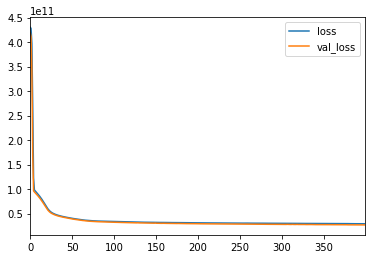

In [95]:
# plot looks good and suggests we could keep on going.  If saw a val_loss start to gain value as epochs
# continue to go up, it means we overfit the data.
losses.plot() 

In [96]:
# Validation on our test data
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

In [97]:
predictions = model.predict(X_test)

In [98]:
predictions

array([[395694.94],
       [596020.9 ],
       [568764.5 ],
       ...,
       [374070.06],
       [563561.56],
       [684413.56]], dtype=float32)

In [99]:
# large values because we are squaring the price of houses
mean_squared_error(y_test,predictions)

26886929318.319023

In [100]:
# look at mean square root error.  Roughly a  $160,000 error
np.sqrt(mean_squared_error(y_test,predictions))

163972.34315066374

In [101]:
mean_absolute_error(y_test,predictions)

101692.935333478

In [103]:
# is that good or bad? Need to look at our dataset
df['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [104]:
# Notice that mean house price is $540,000.  We are off by around 20%, which isn't great
# explained variance score tells you how good you did.  1 is perfect, lower numbers are bad
explained_variance_score(y_test,predictions)


0.7973318900724627

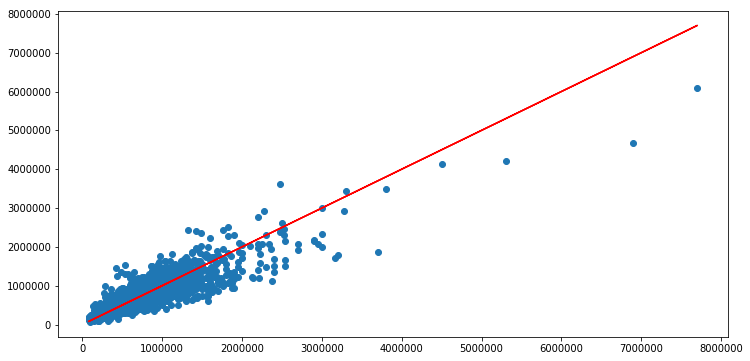

In [107]:
# Can keep training on the training data to see if we can improve.  
# Plot out predictions 
# Looks like we are bad at predicting really expensive houses
# Try to train your data on the 99% of houses.  Or ones that are under the ~$3MM mark
plt.figure(figsize=(12,6))
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,'r')

In [108]:
# Now use model to predict houses, for a house where we have features

df.drop('price',axis=1).iloc[0]

bedrooms            3.0000
bathrooms           1.0000
sqft_living      1180.0000
sqft_lot         5650.0000
floors              1.0000
waterfront          0.0000
view                0.0000
condition           3.0000
grade               7.0000
sqft_above       1180.0000
sqft_basement       0.0000
yr_built         1955.0000
yr_renovated        0.0000
lat                47.5112
long             -122.2570
sqft_living15    1340.0000
sqft_lot15       5650.0000
year             2014.0000
month              10.0000
Name: 0, dtype: float64

In [109]:
# predict the first house price with the above features
single_house = df.drop('price',axis=1).iloc[0]

In [110]:
# Need to change the features to a scaled version
# need to reshape the data into a numpy array
single_house.values

array([ 3.00000e+00,  1.00000e+00,  1.18000e+03,  5.65000e+03,
        1.00000e+00,  0.00000e+00,  0.00000e+00,  3.00000e+00,
        7.00000e+00,  1.18000e+03,  0.00000e+00,  1.95500e+03,
        0.00000e+00,  4.75112e+01, -1.22257e+02,  1.34000e+03,
        5.65000e+03,  2.01400e+03,  1.00000e+01])

In [112]:
single_house.values.reshape(-1,19) #adds the correct bracket notation

array([[ 3.00000e+00,  1.00000e+00,  1.18000e+03,  5.65000e+03,
         1.00000e+00,  0.00000e+00,  0.00000e+00,  3.00000e+00,
         7.00000e+00,  1.18000e+03,  0.00000e+00,  1.95500e+03,
         0.00000e+00,  4.75112e+01, -1.22257e+02,  1.34000e+03,
         5.65000e+03,  2.01400e+03,  1.00000e+01]])

In [113]:
single_house = scaler.transform(single_house.values.reshape(-1,19))

In [114]:
single_house

array([[0.2       , 0.08      , 0.08376422, 0.00310751, 0.        ,
        0.        , 0.        , 0.5       , 0.4       , 0.10785619,
        0.        , 0.47826087, 0.        , 0.57149751, 0.21760797,
        0.16193426, 0.00582059, 0.        , 0.81818182]])

In [115]:
# now predict what the price this house will sell at


array([[286641.4]], dtype=float32)

In [116]:
# Compare to the intial price from the data.
df.head(1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10


In [ ]:
# It sold at $221,900 where we predict $286,641
# Can retrain model using the 99% of data, get rid of the supe high priced homes